In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
clust = pd.read_csv(r'D:\Ashish\Studies\DSBA\PGP-DSBA\Main Course\MODULE 4- Data Mining\Project\Datasets\Clustering\bank_marketing_part1_Data.csv')

In [88]:
head = clust.head()
head.to_csv(r'D:\Ashish\Studies\DSBA\PGP-DSBA\Main Course\MODULE 4- Data Mining\Project\Datasets\Clustering\Tables\sample.csv')
head

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [89]:
clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [90]:
clust.describe(include= 'all').T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


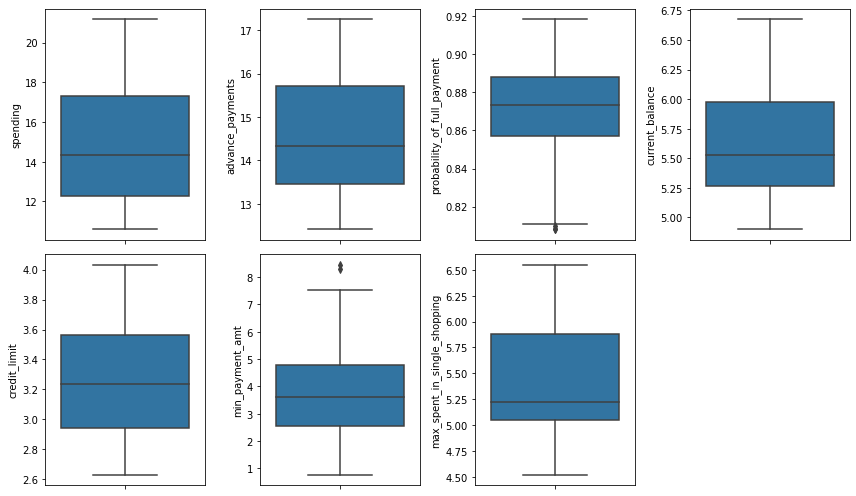

In [91]:
# Checking for outliers
features = clust.columns
plt.figure(figsize= (12,7))
for i in range(len(features)):
    fig = plt.subplot(2, 4, i+1)
    sns.boxplot(data = clust, y = features[i])
    plt.tight_layout()

In [92]:
clust.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

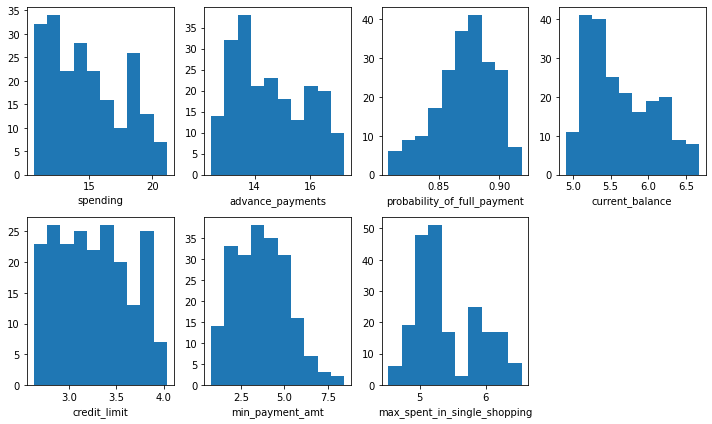

In [93]:
plt.figure(figsize= (10,6))
for i in range(len(features)):
    fig = plt.subplot(2, 4, i+1)
    plt.hist(clust[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

In [94]:
clust.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

In [95]:
clust.kurt()

spending                       -1.084266
advance_payments               -1.106703
probability_of_full_payment    -0.140315
current_balance                -0.785645
credit_limit                   -1.097697
min_payment_amt                -0.066603
max_spent_in_single_shopping   -0.840792
dtype: float64

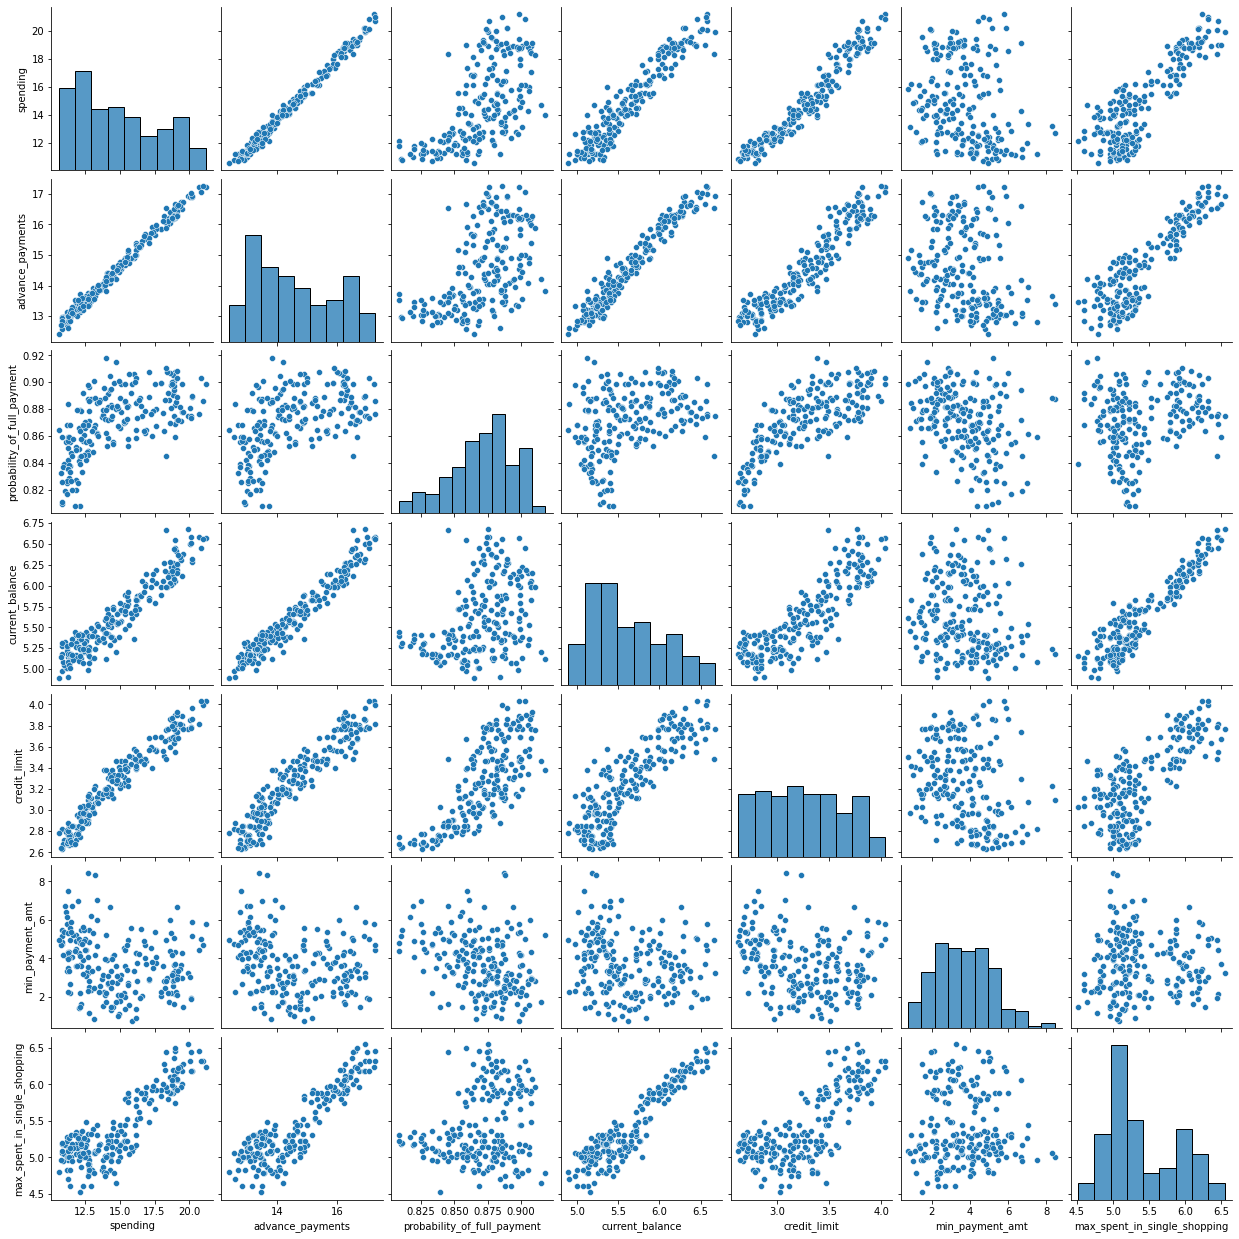

In [96]:
pairplot = sns.pairplot(data = clust);

In [97]:
import os
os.chdir(r'C:\Users\91996\Desktop\New folder (2)')
os.getcwd()

'C:\\Users\\91996\\Desktop\\New folder (2)'

In [98]:
pairplot.savefig('1-pairplot.png')

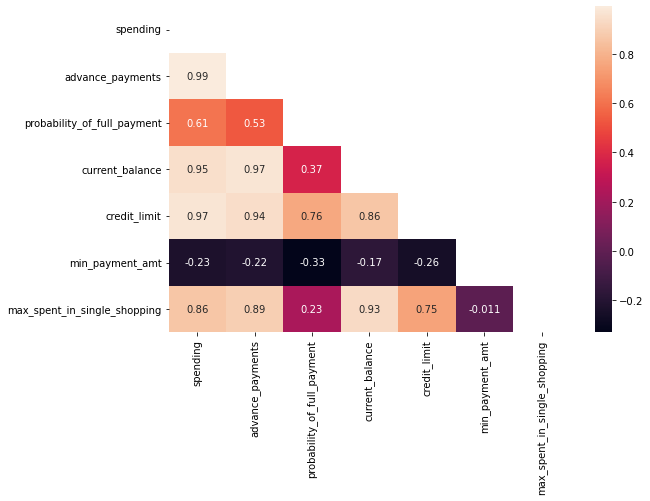

In [99]:
plt.figure(figsize= (9, 6))
sns.heatmap(clust.corr(), mask = np.triu(clust.corr()), annot = True);
plt.savefig('1- Heatmap.png')

In [100]:
# Treating Outliers
def get_lim(col):
    sorted(col)
    q1, q3 = col.quantile([0.25, 0.75])
    iqr = q3 - q1
    ll = q1 - (1.5*iqr)
    ul = q3 + (1.5*iqr)
    return ll, ul

In [101]:
for col in range(len(features)):
    ll, ul = get_lim(clust[features[i]])
    clust[features[i]] = np.where(clust[features[i]] > ul, ul, clust[features[i]])
    clust[features[i]] = np.where(clust[features[i]] < ll, ll, clust[features[i]])

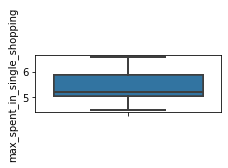

In [102]:
for col in range(len(features)):
    fig = plt.subplot(4, 2, i+1)
    sns.boxplot(y = clust[features[i]])
    plt.tight_layout()

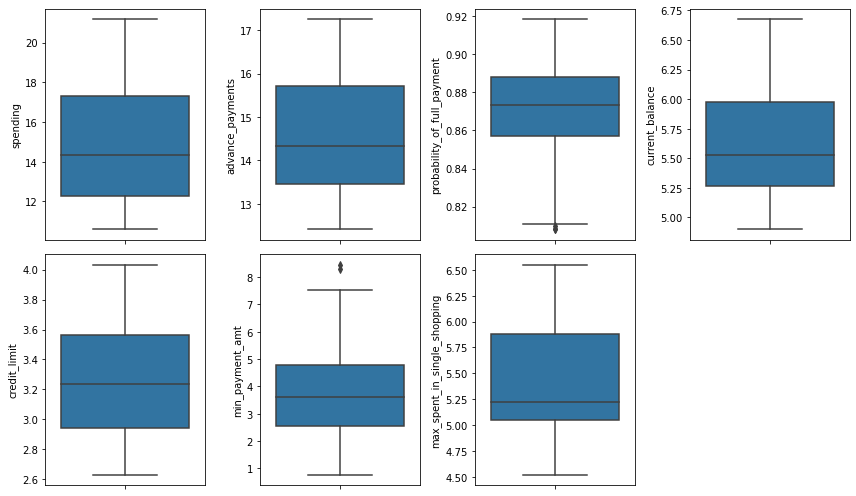

In [103]:
plt.figure(figsize= (12,7))
for i in range(len(features)):
    fig = plt.subplot(2, 4, i+1)
    sns.boxplot(data = clust, y = features[i])
    plt.tight_layout()

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(clust)
trans = scaler.transform(clust)
clust_scaled = pd.DataFrame(trans, columns= clust.columns)
clust_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,0.402032,0.274759,0.0,0.158640,0.355524,0.634089,1.0
advance_payments,210.0,0.444067,0.269826,0.0,0.214876,0.394628,0.682851,1.0
probability_of_full_payment,210.0,0.570767,0.214423,0.0,0.442831,0.593013,0.723004,1.0
current_balance,210.0,0.410773,0.249473,0.0,0.204533,0.351633,0.608530,1.0
credit_limit,210.0,0.448043,0.269219,0.0,0.223806,0.432644,0.664113,1.0
min_payment_amt,210.0,0.381633,0.195498,0.0,0.233575,0.368474,0.520570,1.0
max_spent_in_single_shopping,210.0,0.437751,0.241989,0.0,0.258986,0.346627,0.668636,1.0


In [105]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

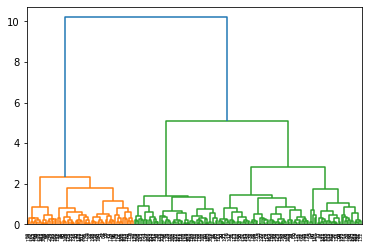

In [106]:
ward_link = linkage(clust_scaled, method= 'ward')
dend = dendrogram(ward_link)

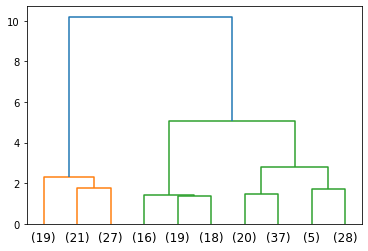

In [107]:
dend = dendrogram(ward_link, truncate_mode= 'lastp', p = 10)
plt.savefig('1- dendrogram_last_10.png')

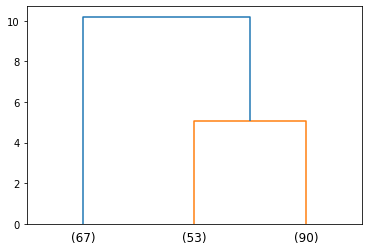

In [108]:
dend = dendrogram(ward_link, truncate_mode= 'lastp', p = 3)

In [109]:
# Forming clusters
clusters = fcluster(ward_link, 10, criterion= 'maxclust')
clust_scaled['Cluster'] = clusters

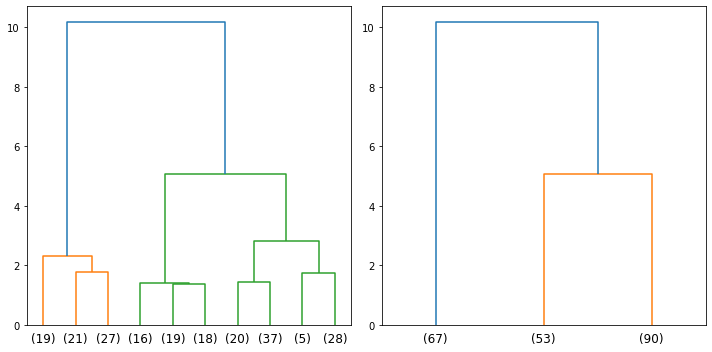

In [110]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
dend = dendrogram(ward_link, truncate_mode= 'lastp', p = 10)
plt.subplot(1,2,2)
dend = dendrogram(ward_link, truncate_mode= 'lastp', p = 3)
plt.tight_layout()
plt.savefig('1- dendrograms.png')

In [111]:
# K Means Clustering

In [112]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters= 2)
k_means.fit(clust_scaled)

KMeans(n_clusters=2)

In [113]:
k_means.inertia_

439.9965933056147

In [114]:
wss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters= i)
    k_means.fit(clust_scaled)
    wss.append(k_means.inertia_)

c:\Users\91996\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


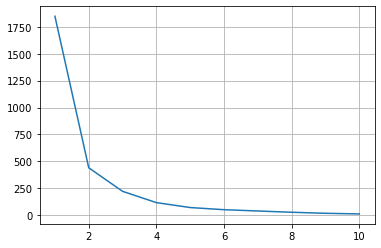

In [115]:
# scree plot
plt.plot(range(1, 11), wss)
plt.grid()
plt.savefig('1- wss plot.png')
plt.show()

In [116]:
k_means = KMeans(n_clusters= 3)
k_means.fit(clust_scaled)

KMeans(n_clusters=3)

In [117]:
labels = k_means.labels_

In [118]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [119]:
sil_score = silhouette_score(clust_scaled, labels)
sil_score

0.5881920013109782

In [120]:
ss = []
for i in range(2, 20):
    clusterer = KMeans(n_clusters= i, init= 'k-means++')
    y = clusterer.fit_predict(clust_scaled)
    s = silhouette_score(clust_scaled, y)
    ss.append(s)

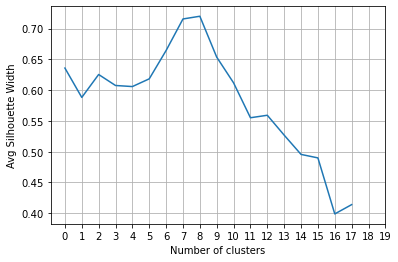

In [121]:
plt.plot(ss)
plt.xticks(np.arange(0,20))
plt.ylabel('Avg Silhouette Width')
plt.xlabel('Number of clusters')
plt.grid()
plt.savefig('1- sil_score.png')
plt.show()

In [122]:
# Finally, we go with k = 3
k_means = KMeans(n_clusters= 3)
k_means.fit(clust_scaled)
labels = k_means.labels_

In [123]:
sil_score = silhouette_score(clust_scaled, labels)
sil_score

0.5881920013109782

In [124]:
sil_samp = silhouette_samples(clust_scaled, labels)
min(sil_samp)

0.21283501874713603

In [125]:
clust_k_mean = clust
clust_k_mean['Cluster'] = labels
clust_k_mean.to_csv(r'D:\Ashish\Studies\DSBA\PGP-DSBA\Main Course\MODULE 4- Data Mining\Project\km_clust.csv')
clust_k_mean.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2


In [126]:
clust_k_mean.groupby('Cluster').mean()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
Cluster,,,,,,,
0,14.903019,14.571132,0.881602,5.595660,3.314755,2.480757,5.206698
1,12.131111,13.342222,0.855044,5.242144,2.902856,4.421312,5.058289
2,18.452537,16.184776,0.884042,6.173567,3.692060,3.696179,6.037224


### Classification

In [2]:
class_ds = pd.read_csv(r'D:\Ashish\Studies\DSBA\PGP-DSBA\Main Course\MODULE 4- Data Mining\Project\Datasets\Classification\insurance_part2_data.csv')

In [3]:
classification_ds_sample = class_ds.head()
classification_ds_sample.to_csv(r'D:\Ashish\Studies\DSBA\PGP-DSBA\Main Course\MODULE 4- Data Mining\Project\Datasets\Classification\classification_ds_sample.csv')
classification_ds_sample

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
class_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [5]:
#for i in class_ds.columns:
#    if class_ds[i].dtype == 'object':
#        class_ds[i] = pd.Categorical(class_ds[i]).codes

In [6]:
description = class_ds.describe(include= 'all').T
description.to_csv(r'D:\Ashish\Studies\DSBA\PGP-DSBA\Main Course\MODULE 4- Data Mining\Project\Datasets\Classification\description.csv')
description

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
class_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [8]:
class_ds.Duration = np.where(class_ds.Duration < 1, 1, class_ds.Duration)

In [9]:
class_ds_code = class_ds
for i in class_ds_code.columns:
    if class_ds_code[i].dtype == 'object':
        class_ds_code[i] = pd.Categorical(class_ds_code[i]).codes

In [10]:
class_ds_code.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [11]:
class_ds_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [12]:
num_feat = class_ds[['Age', 'Commision', 'Duration', 'Sales']]
num_feat.head()

,Age,Commision,Duration,Sales
0,48,0.70,7,2.51
1,36,0.00,34,20.00
2,39,5.94,3,9.90
3,36,0.00,4,26.00
4,33,6.30,53,18.00


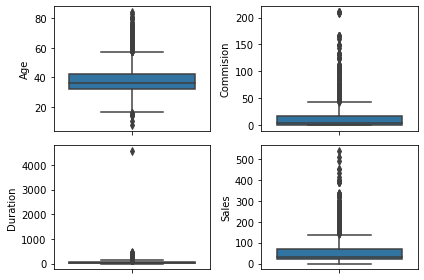

In [13]:
feat = num_feat.columns
for i in range(len(feat)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data= num_feat, y = feat[i])
    plt.tight_layout()

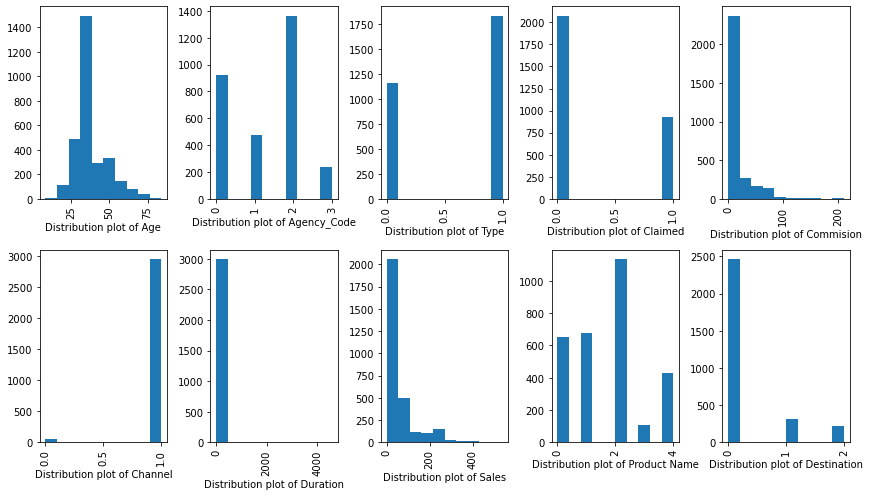

In [14]:
features = class_ds.columns
plt.figure(figsize= (12,7))
for i in range(len(features)):
    plt.subplot(2, 5, i+1)
    plt.hist(class_ds[features[i]])
    plt.xticks(rotation = 90)
    plt.xlabel('Distribution plot of {}'.format(features[i]))
    plt.tight_layout()

In [15]:
class_ds_code.skew()

Age              1.149713
Agency_Code     -0.155126
Type            -0.461352
Claimed          0.832185
Commision        3.148858
Channel         -7.892734
Duration        13.784873
Sales            2.381148
Product Name     0.432670
Destination      2.188556
dtype: float64

In [16]:
class_ds.kurt()

Age               1.652124
Agency_Code      -1.299819
Type             -1.788347
Claimed          -1.308340
Commision        13.984825
Channel          60.335475
Duration        427.596288
Sales             6.155248
Product Name     -0.578514
Destination       3.486657
dtype: float64

In [17]:
for i in class_ds.columns:
    if class_ds[i].dtype == 'object':
        class_ds[i] = pd.Categorical(class_ds[i]).codes

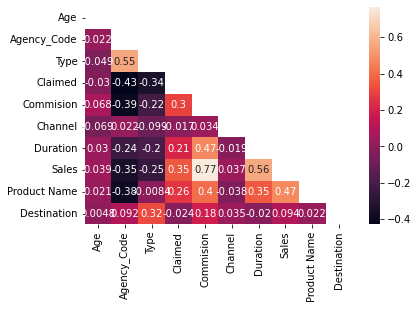

In [21]:
sns.heatmap(class_ds_code.corr(), mask= np.triu(class_ds_code.corr()), annot= True);

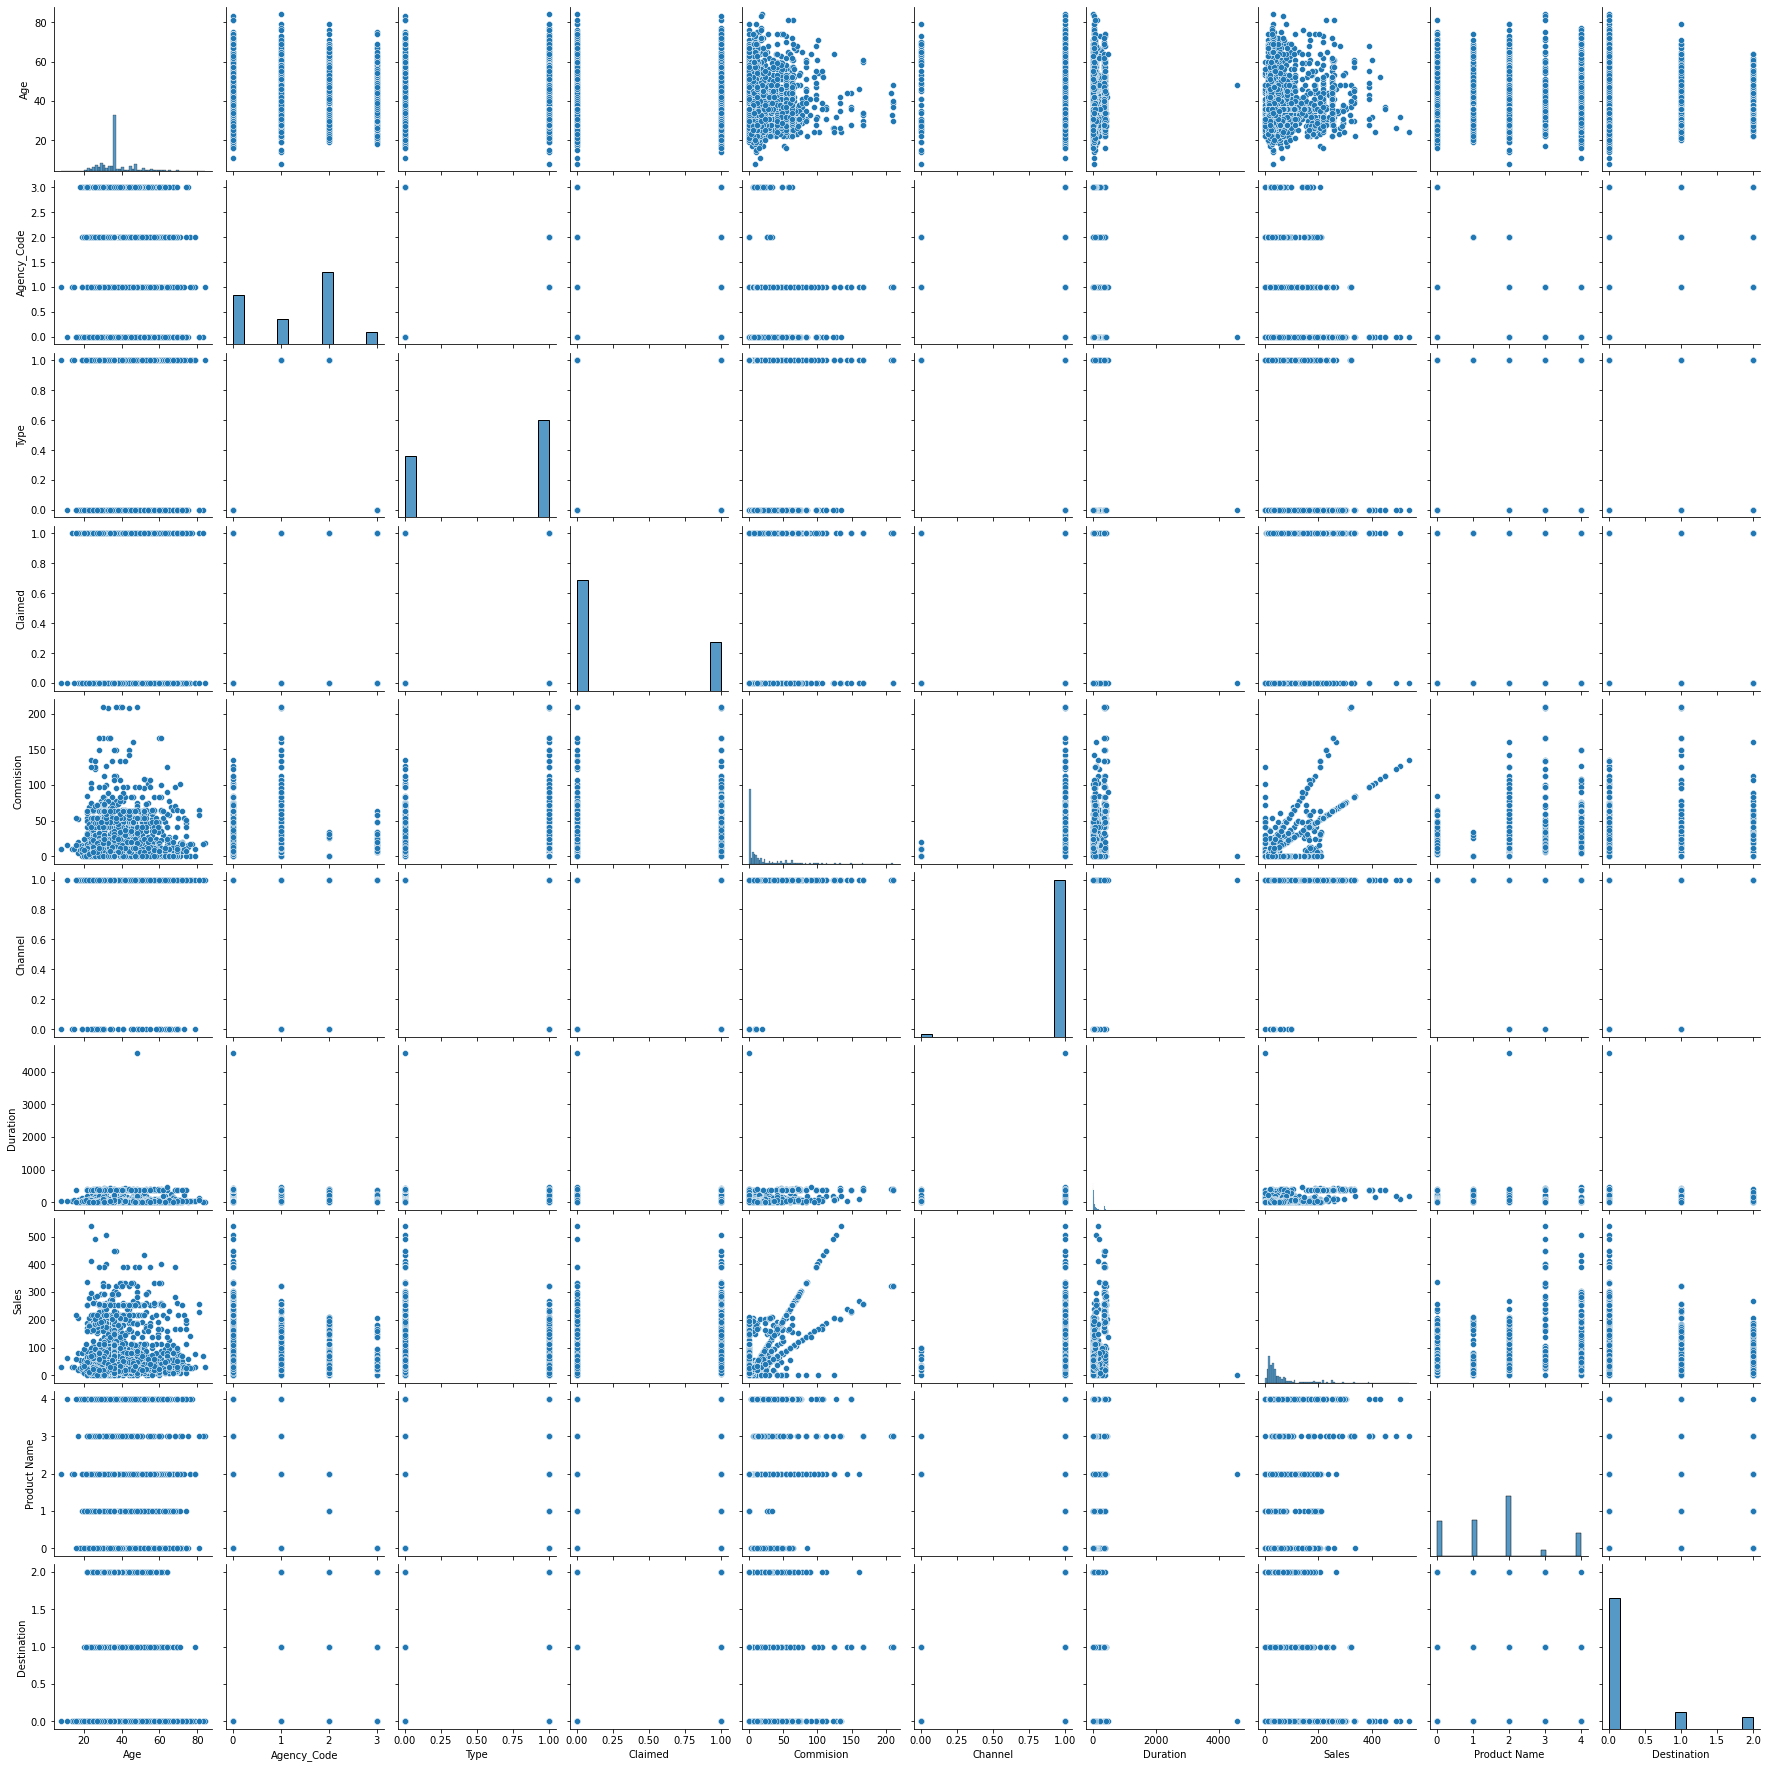

In [22]:
sns.pairplot(data = class_ds_code);

In [18]:
X = class_ds_code.drop('Claimed', axis= 1)
y = class_ds_code['Claimed']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state= 0)

In [20]:
# Building Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'gini',
min_samples_split= 42,
min_samples_leaf= 14,
max_depth= 10)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=14, min_samples_split=42)

In [21]:
from sklearn import tree
tree_char_label = ['No', 'Yes']
tree_file = open(r'D:\Ashish\Studies\DSBA\PGP-DSBA\Main Course\MODULE 4- Data Mining\Project\P Notebook\tree.dot', 'w')
dot_data = tree.export_graphviz(dt_model, out_file= tree_file,
feature_names = list(X_train),
class_names = tree_char_label)
tree_file.close()

In [22]:
y_train_predict_dt = dt_model.predict(X_train)
y_test_predict_dt = dt_model.predict(X_test)

In [73]:
# Evaluating model prediction of Decision tree
print(classification_report(y_train, y_train_predict_dt))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1464
           1       0.72      0.57      0.63       636

    accuracy                           0.80      2100
   macro avg       0.77      0.74      0.75      2100
weighted avg       0.79      0.80      0.79      2100



In [74]:
print(classification_report(y_test, y_test_predict_dt))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       612
           1       0.70      0.50      0.58       288

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



In [75]:
confusion_matrix(y_train, y_train_predict_dt)

array([[1324,  140],
       [ 276,  360]], dtype=int64)

In [76]:
confusion_matrix(y_test, y_test_predict_dt)

array([[549,  63],
       [143, 145]], dtype=int64)

In [77]:
# calculating probabilities 
y_train_prob_dt = dt_model.predict_proba(X_train)
y_train_prob_dt = y_train_prob_dt[:, 1]
y_test_prob_dt = dt_model.predict_proba(X_test)
y_test_prob_dt = y_test_prob_dt[:,1]

In [78]:
auc = roc_auc_score(y_train, y_train_prob_dt)
auc

0.7054872495446266

In [79]:
auc = roc_auc_score(y_test, y_test_prob_dt)
auc

0.7241001724763979

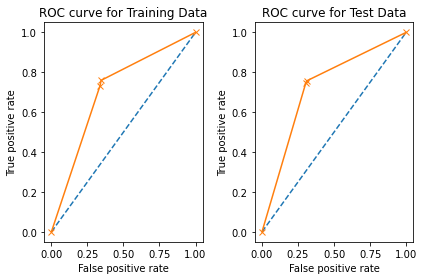

In [82]:
# roc curve
# for training data (DT Model)
plt.subplot(1, 2, 1)
dt_fpr_trg, dt_tpr_trg, dt_threshold_trg = roc_curve(y_train, y_train_prob_dt)
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(dt_fpr_trg, dt_tpr_trg, marker = 'x')
plt.title('ROC curve for Training Data')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.subplot(1,2, 2)
dt_fpr_test, dt_tpr_test, dt_threshold_test = roc_curve(y_test, y_test_prob_dt)
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(dt_fpr_test, dt_tpr_test, marker = 'x')
plt.title('ROC curve for Test Data')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.tight_layout()

In [29]:
# Building a Random Forest Classifier model

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators= 501, 
oob_score= True,
max_depth= 10,
min_samples_leaf= 15,
min_samples_split= 45)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=45,
                       n_estimators=501, oob_score=True)

In [30]:
# Using GridSearchCV to find best parameters and implementing them
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth' : [7, 10],
    'max_features' : [ 4, 6],
    'min_samples_leaf' : [14, 15],
    'min_samples_split' : [42, 45],
    'n_estimators' : [301, 501]
}
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf_model, param_grid= param_grid, cv= 3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [14, 15],
                         'min_samples_split': [42, 45],
                         'n_estimators': [301, 501]})

In [31]:
best_rf_grid = grid_search.best_estimator_

In [57]:
ytrain_predict_rf = best_rf_grid.predict(X_train)
ytrain_prob_rf = best_rf_grid.predict_proba(X_train)
ytrain_prob_rf = ytrain_prob_rf[:,1]
ytest_predict_rf = best_rf_grid.predict(X_test)
ytest_prob_rf = best_rf_grid.predict_proba(X_test)
ytest_prob_rf = ytest_prob_rf[:,1]

In [52]:
# Evaluating model prediction of Random Forest model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
print(classification_report(y_train, ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1464
           1       0.72      0.62      0.66       636

    accuracy                           0.81      2100
   macro avg       0.78      0.76      0.77      2100
weighted avg       0.80      0.81      0.81      2100



In [35]:
# Evaluating model prediction of Random Forest model
print(classification_report(y_test, ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       612
           1       0.74      0.58      0.65       288

    accuracy                           0.80       900
   macro avg       0.78      0.74      0.75       900
weighted avg       0.79      0.80      0.79       900



In [36]:
confusion_matrix(y_train, ytrain_predict_rf)

array([[1309,  155],
       [ 244,  392]], dtype=int64)

In [37]:
confusion_matrix(y_test, ytest_predict_rf)

array([[553,  59],
       [122, 166]], dtype=int64)

In [59]:
auc = roc_auc_score(y_train, ytrain_prob_rf)
auc

0.6951301895384404

In [60]:
auc = roc_auc_score(y_test, ytest_prob_rf)
auc

0.7220435049019608

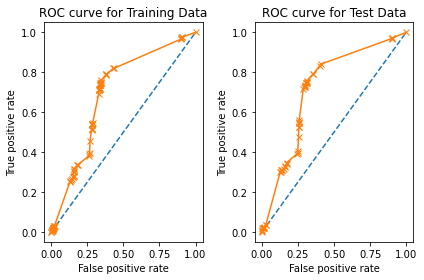

In [83]:
plt.subplot(1, 2, 1)
rf_fpr_trg, rf_tpr_trg, rf_threshold_trg = roc_curve(y_train, ytrain_prob_rf)
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(rf_fpr_trg, rf_tpr_trg, marker = 'x')
plt.title('ROC curve for Training Data')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.subplot(1,2, 2)
rf_fpr_test, rf_tpr_test, rf_threshold_test = roc_curve(y_test, ytest_prob_rf)
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(rf_fpr_test, rf_tpr_test, marker = 'x')
plt.title('ROC curve for Test Data')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.tight_layout()

In [41]:
# ANN requires feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [42]:
# Building ANN Classifier model
from sklearn.neural_network import MLPClassifier
ann_model = MLPClassifier(hidden_layer_sizes= 100,
solver= 'sgd',
verbose= True,
tol= 0.01,
random_state= 0)
ann_model.fit(X_train, y_train)

Iteration 1, loss = 0.68200790
Iteration 2, loss = 0.66139777
Iteration 3, loss = 0.63762689
Iteration 4, loss = 0.61637935
Iteration 5, loss = 0.59827784
Iteration 6, loss = 0.58354786
Iteration 7, loss = 0.57131357
Iteration 8, loss = 0.56114458
Iteration 9, loss = 0.55254717
Iteration 10, loss = 0.54546830
Iteration 11, loss = 0.53952748
Iteration 12, loss = 0.53433239
Iteration 13, loss = 0.52993981
Iteration 14, loss = 0.52603971
Iteration 15, loss = 0.52275376
Iteration 16, loss = 0.51981605
Iteration 17, loss = 0.51719788
Iteration 18, loss = 0.51496275
Iteration 19, loss = 0.51287063
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, random_state=0, solver='sgd', tol=0.01,
              verbose=True)

In [43]:
# Getting best parameters for ANN model through Grid search
param_grid = {
    'hidden_layer_sizes' : [100],
    'max_iter' : [2000, 2500, 3000],
    'solver' : ['sgd', 'adam'],
    'tol' : [0.01]
}

In [44]:
ann_model = MLPClassifier(random_state= 1)
grid_search = GridSearchCV(estimator= ann_model, param_grid= param_grid, cv = 4)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 2000, 'solver': 'adam', 'tol': 0.01}

In [45]:
best_ann_grid = grid_search.best_estimator_
best_ann_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=2000, random_state=1, tol=0.01)

In [47]:
best_ann_grid.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=100, max_iter=2000, random_state=1, tol=0.01)

In [69]:
y_train_predict_ann = best_ann_grid.predict(X_train)
y_train_prob_ann = best_ann_grid.predict_proba(X_train)
y_train_prob_ann = y_train_prob_ann[:,1]
y_test_predict_ann = best_ann_grid.predict(X_test)
y_test_prob_ann = best_ann_grid.predict_proba(X_test)
y_test_prob_ann = y_test_prob_ann[:,1]


In [63]:
# classification report, accuracy, confusion matrix, auc score, roc curve

In [64]:
print(classification_report(y_train, y_train_predict_ann))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1464
           1       0.69      0.47      0.56       636

    accuracy                           0.78      2100
   macro avg       0.74      0.69      0.70      2100
weighted avg       0.76      0.78      0.76      2100



In [65]:
confusion_matrix(y_train, y_train_predict_ann)

array([[1328,  136],
       [ 336,  300]], dtype=int64)

In [66]:
print(classification_report(y_test, y_test_predict_ann))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       612
           1       0.74      0.45      0.56       288

    accuracy                           0.77       900
   macro avg       0.76      0.69      0.71       900
weighted avg       0.77      0.77      0.76       900



In [67]:
confusion_matrix(y_test, y_test_predict_ann)

array([[566,  46],
       [157, 131]], dtype=int64)

In [70]:
auc = roc_auc_score(y_train, y_train_prob_ann)
auc

0.8042399130494553

In [71]:
auc = roc_auc_score(y_test, y_test_prob_ann)
auc

0.8236513934277414

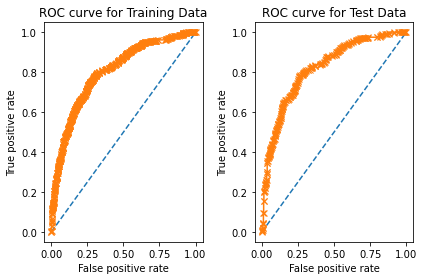

In [84]:
plt.subplot(1, 2, 1)
ann_fpr_trg, ann_tpr_trg, ann_threshold_trg = roc_curve(y_train, y_train_prob_ann)
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(ann_fpr_trg, ann_tpr_trg, marker = 'x')
plt.title('ROC curve for Training Data')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.subplot(1,2, 2)
ann_fpr_test, ann_tpr_test, ann_threshold_test = roc_curve(y_test, y_test_prob_ann)
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(ann_fpr_test, ann_tpr_test, marker = 'x')
plt.title('ROC curve for Test Data')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.tight_layout()

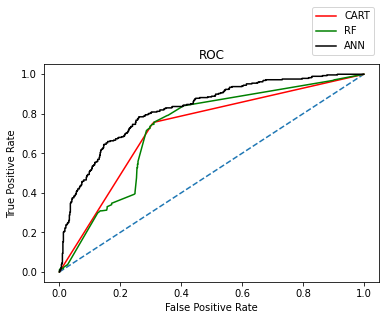

In [86]:
# roc curve for all the 3 models on test data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dt_fpr_test, dt_tpr_test,color='red',label="CART")
plt.plot(rf_fpr_test,rf_tpr_test,color='green',label="RF")
plt.plot(ann_fpr_test,ann_tpr_test,color='black',label="ANN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.show()